# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [83]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | nabire
Processing Record 3 of Set 1 | remire-montjoly
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | forster
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | rozaje
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | amos
Processing Record 12 of Set 1 | ath thawrah
Processing Record 13 of Set 1 | samux
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | hampton bays
Processing Record 17 of Set 1 | ballina
Processing Record 18 of Set 1 | palikir - national government center
Processing Record 19 of Set 1 | upington
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | taiohae
City not found. Skipping

Processing Record 38 of Set 4 | flying fish cove
Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | zhangjiakou
Processing Record 42 of Set 4 | kangding
Processing Record 43 of Set 4 | punta arenas
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | argo
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | san patricio
Processing Record 48 of Set 4 | greenville
Processing Record 49 of Set 4 | dzhangala
Processing Record 0 of Set 5 | tsiombe
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | gornozavodsk
Processing Record 3 of Set 5 | tolanaro
Processing Record 4 of Set 5 | grand falls-windsor
Processing Record 5 of Set 5 | rabigh
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | sidon
Processing Record 8 of Set 5 | christchurch
Processing Record 9 of Set 5 | dickinson
Processing Record 10 of Set 5 | happy valley-goose bay
Processi

Processing Record 28 of Set 8 | preobrazheniye
Processing Record 29 of Set 8 | dunedin
Processing Record 30 of Set 8 | leava
Processing Record 31 of Set 8 | charters towers
Processing Record 32 of Set 8 | atafu village
Processing Record 33 of Set 8 | harsud
Processing Record 34 of Set 8 | labytnangi
Processing Record 35 of Set 8 | badger
Processing Record 36 of Set 8 | kotagiri
Processing Record 37 of Set 8 | kuraymah
Processing Record 38 of Set 8 | kodinsk
Processing Record 39 of Set 8 | gaspe
Processing Record 40 of Set 8 | pacific grove
Processing Record 41 of Set 8 | ixtapa
Processing Record 42 of Set 8 | gudalur
Processing Record 43 of Set 8 | nyagan
Processing Record 44 of Set 8 | krasnokamensk
Processing Record 45 of Set 8 | agva
City not found. Skipping...
Processing Record 46 of Set 8 | pasuquin
Processing Record 47 of Set 8 | st. john's
Processing Record 48 of Set 8 | port elizabeth
Processing Record 49 of Set 8 | bakchar
Processing Record 0 of Set 9 | hailar
Processing Recor

Processing Record 19 of Set 12 | bereket
Processing Record 20 of Set 12 | nema
Processing Record 21 of Set 12 | miandrivazo
Processing Record 22 of Set 12 | kanash
Processing Record 23 of Set 12 | yangiobod
Processing Record 24 of Set 12 | dhidhdhoo
Processing Record 25 of Set 12 | antalaha
Processing Record 26 of Set 12 | fort mcmurray
Processing Record 27 of Set 12 | fortaleza
Processing Record 28 of Set 12 | that phanom
Processing Record 29 of Set 12 | jiaojiang
Processing Record 30 of Set 12 | malvan
Processing Record 31 of Set 12 | dalandzadgad
Processing Record 32 of Set 12 | amurzet
Processing Record 33 of Set 12 | san miguel panixtlahuaca
Processing Record 34 of Set 12 | wynyard
Processing Record 35 of Set 12 | bodaybo
Processing Record 36 of Set 12 | la libertad
Processing Record 37 of Set 12 | labuan lombok
City not found. Skipping...
Processing Record 38 of Set 12 | pedernales
Processing Record 39 of Set 12 | shitanjing
Processing Record 40 of Set 12 | hassi messaoud
Process

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [85]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,32.02,80,75,12.66,GL,1686142420
1,nabire,-3.3667,135.4833,77.95,90,100,2.62,ID,1686142420
2,remire-montjoly,4.9167,-52.2667,82.44,78,40,3.44,GF,1686142420
3,walvis bay,-22.9575,14.5053,67.15,55,0,8.05,NA,1686142155
4,avarua,-21.2078,-159.7750,73.45,73,20,5.75,CK,1686142283
...,...,...,...,...,...,...,...,...,...
582,damavand,35.7178,52.0650,74.98,33,100,11.65,IR,1686142475
583,katsuren-haebaru,26.3369,127.8719,79.57,98,0,9.22,JP,1686142475
584,suva,-18.1416,178.4415,69.28,100,75,3.44,FJ,1686142475
585,nzerekore,7.7562,-8.8179,83.17,64,100,4.76,GN,1686142475


In [86]:
# Export the City_Data into a csv
import os
#os.makedirs("output_data")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.head()
city_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
582,damavand,35.7178,52.0650,74.98,33,100,11.65,IR,1686142475
583,katsuren-haebaru,26.3369,127.8719,79.57,98,0,9.22,JP,1686142475
584,suva,-18.1416,178.4415,69.28,100,75,3.44,FJ,1686142475
585,nzerekore,7.7562,-8.8179,83.17,64,100,4.76,GN,1686142475
586,malpica,43.3228,-8.8105,70.25,65,100,4.25,ES,1686142475


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

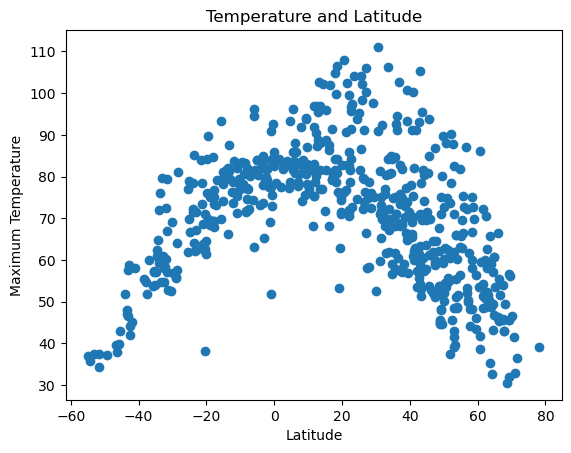

In [88]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y)

# Incorporate the other graph properties
plt.title("Temperature and Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

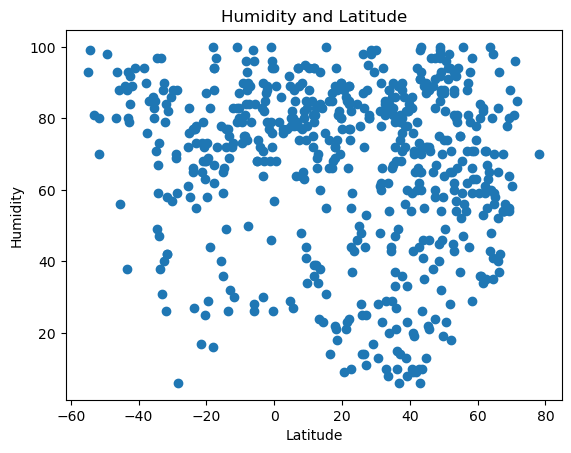

In [89]:
# Build the scatter plots for latitude vs. humidity
y_humid = city_data_df["Humidity"]
plt.scatter(x, y_humid)

# Incorporate the other graph properties
plt.title("Humidity and Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

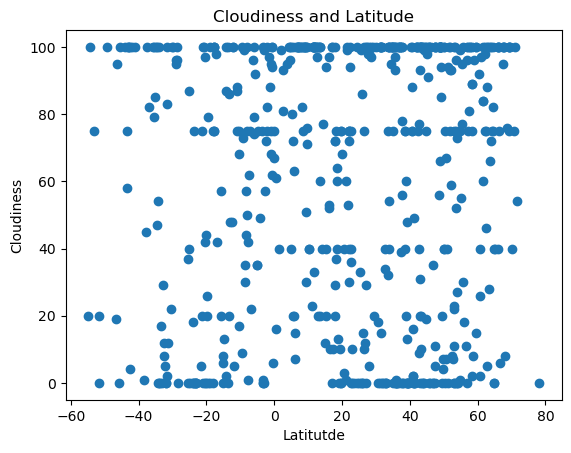

In [90]:
# Build the scatter plots for latitude vs. cloudiness
y_cloud = city_data_df["Cloudiness"]
plt.scatter(x, y_cloud)

# Incorporate the other graph properties
plt.title("Cloudiness and Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitutde")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

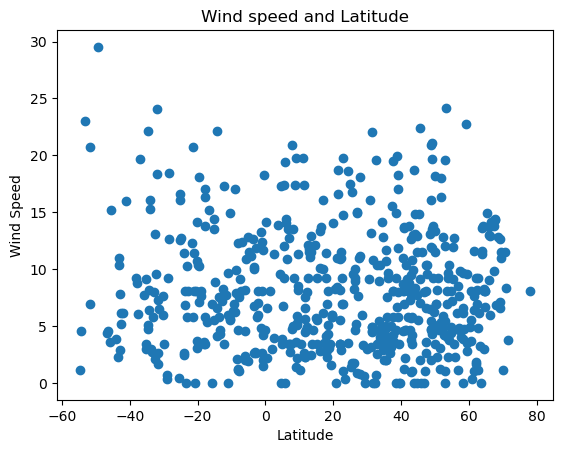

In [91]:
# Build the scatter plots for latitude vs. wind speed
y_wind = city_data_df["Wind Speed"]
plt.scatter(x, y_wind)

# Incorporate the other graph properties
plt.title("Wind speed and Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


LinregressResult(slope=-0.08908511382588409, intercept=72.08484355275989, rvalue=-0.17704119484916941, pvalue=1.6007193269559774e-05, stderr=0.020475652660686766, intercept_stderr=0.7694726279563067)


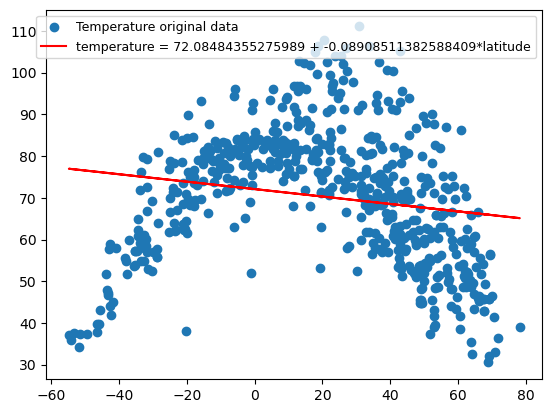

In [92]:
# Define a function to create Linear Regression plots
#temperature
temp_slope, temp_int, temp_r, temp_p, temp_se = linregress(x, y)
result_temp = linregress(x, y)
print(result_temp)
plt.plot(x, y, 'o', label = "Temperature original data")
plt.plot(x, temp_int + temp_slope * x, 'r', label = f"temperature = {temp_int} + {temp_slope}*latitude")
plt.legend(fontsize = 9)
plt.show()

LinregressResult(slope=-0.10263953393224132, intercept=68.92562235406582, rvalue=-0.13696146200945392, pvalue=0.000878081323572921, stderr=0.030692080009129135, intercept_stderr=1.1534047707018342)


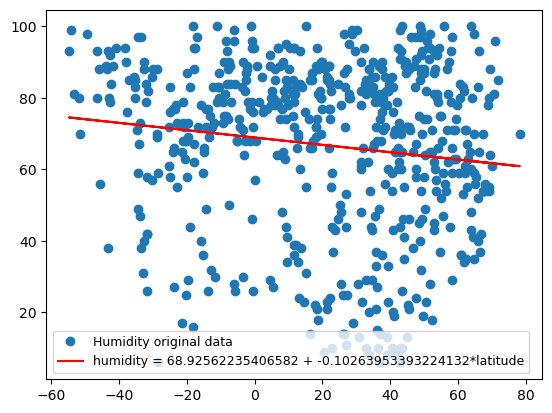

In [93]:
# Define a function to create Linear Regression plots
#humidity
hum_slope, hum_int, hum_r, hum_p, hum_se = linregress(x, y_humid)
result_hum = linregress(x, y_humid)
print(result_hum)
plt.plot(x, y_humid, 'o', label = "Humidity original data")
plt.plot(x, hum_int + hum_slope * x, 'r', label = f"humidity = {hum_int} + {hum_slope}*latitude")
plt.legend(fontsize = 9)
plt.show()

LinregressResult(slope=0.0849551600371348, intercept=57.56303881955099, rvalue=0.06686317543938321, pvalue=0.10559260263317621, stderr=0.05241454956053008, intercept_stderr=1.9697326313277288)


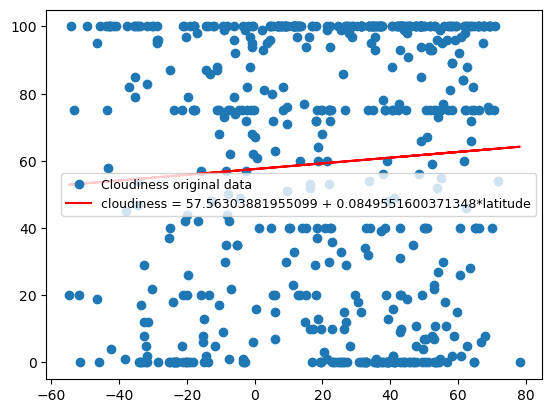

In [94]:
# Define a function to create Linear Regression plots
#cloudiness
cloud_slope, cloud_int, cloud_r, cloud_p, cloud_se = linregress(x, y_cloud)
result_cloud = linregress(x, y_cloud)
print(result_cloud)
plt.plot(x, y_cloud, 'o', label = "Cloudiness original data")
plt.plot(x, cloud_int + cloud_slope * x, 'r', label = f"cloudiness = {cloud_int} + {cloud_slope}*latitude")
plt.legend(fontsize = 9)
plt.show()

LinregressResult(slope=-0.00745097699606596, intercept=8.099638579263328, rvalue=-0.04428575297815546, pvalue=0.28408067733840286, stderr=0.006949362443537389, intercept_stderr=0.2611562264052501)


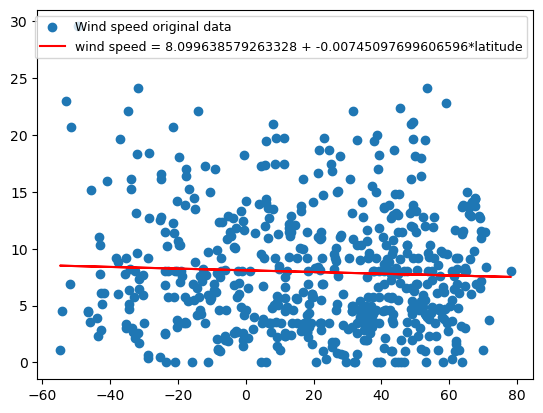

In [95]:
# Define a function to create Linear Regression plots
#wind speed
wind_slope, wind_int, wind_r, wind_p, wind_se = linregress(x, y_wind)
result_wind = linregress(x, y_wind)
print(result_wind)
plt.plot(x, y_wind, 'o', label = "Wind speed original data")
plt.plot(x, wind_int + wind_slope * x, 'r', label = f"wind speed = {wind_int} + {wind_slope}*latitude")
plt.legend(fontsize = 9)
plt.show()

In [96]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,32.02,80,75,12.66,GL,1686142420
2,remire-montjoly,4.9167,-52.2667,82.44,78,40,3.44,GF,1686142420
9,amos,48.5669,-78.1162,53.76,45,56,13.11,CA,1686142421
10,ath thawrah,35.8469,38.5443,92.71,21,1,7.52,SY,1686142421
11,samux,40.7647,46.4085,69.01,83,75,6.91,AZ,1686142421


In [97]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nabire,-3.3667,135.4833,77.95,90,100,2.62,ID,1686142420
3,walvis bay,-22.9575,14.5053,67.15,55,0,8.05,NaN,1686142155
4,avarua,-21.2078,-159.7750,73.45,73,20,5.75,CK,1686142283
5,port alfred,-33.5906,26.8910,76.17,38,0,3.00,ZA,1686142421
6,forster,-32.1667,152.5167,58.39,79,5,9.60,AU,1686142421
...,...,...,...,...,...,...,...,...,...
566,isangel,-19.5500,169.2667,69.71,69,79,10.31,VU,1686142474
570,iquique,-20.2208,-70.1431,64.44,68,0,3.71,CL,1686142461
575,alofi,-19.0595,-169.9187,75.09,83,100,8.05,NU,1686142474


###  Temperature vs. Latitude Linear Regression Plot

LinregressResult(slope=-0.6101415899851029, intercept=93.35015748514388, rvalue=-0.6895082103168306, pvalue=2.149859233135243e-60, stderr=0.03138545099817111, intercept_stderr=1.303417399168037)


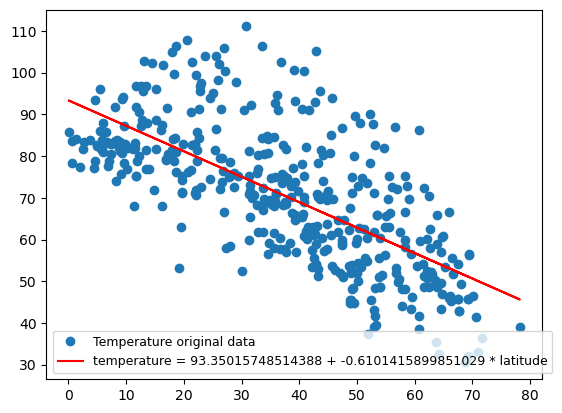

In [98]:
# Linear regression on Northern Hemisphere
nx = northern_hemi_df["Lat"]
ntempy = northern_hemi_df["Max Temp"]

ntemp_slope, ntemp_int, ntemp_r, ntemp_p, ntemp_se = linregress(nx, ntempy)
result_ntemp = linregress(nx, ntempy)
print(result_ntemp)
plt.plot(nx, ntempy, 'o', label = "Temperature original data")
plt.plot(nx, ntemp_int + ntemp_slope * nx, 'r', label = f"temperature = {ntemp_int} + {ntemp_slope} * latitude")
plt.legend(fontsize = 9)
plt.show()

LinregressResult(slope=0.7796878354767712, intercept=85.2760051163913, rvalue=0.8016856095830166, pvalue=6.131420720686316e-39, stderr=0.04512105504913454, intercept_stderr=1.1352307949795284)


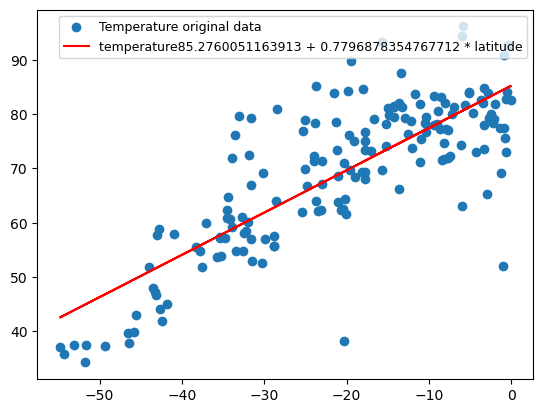

In [99]:
# Linear regression on Southern Hemisphere
sx = southern_hemi_df["Lat"]
stempy = southern_hemi_df["Max Temp"]

stemp_slope, stemp_int, stemp_r, stemp_p, stemp_se = linregress(sx, stempy)
result_stemp = linregress(sx, stempy)
print(result_stemp)
plt.plot(sx, stempy, 'o', label = "Temperature original data")
plt.plot(sx, stemp_int + stemp_slope * sx, 'r', label = f"temperature{stemp_int} + {stemp_slope} * latitude")
plt.legend(fontsize = 9)
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a negative relationship between latitude and temperature; in the southern hemisphere, there is a positive relationship. As one approaches the equator, the temperature gets higher.

### Humidity vs. Latitude Linear Regression Plot

LinregressResult(slope=-0.06521252867027098, intercept=67.26654380861062, rvalue=-0.04990028415031372, pvalue=0.30819496688126247, stderr=0.06391732856102052, intercept_stderr=2.654445149111572)


<function matplotlib.pyplot.show(close=None, block=None)>

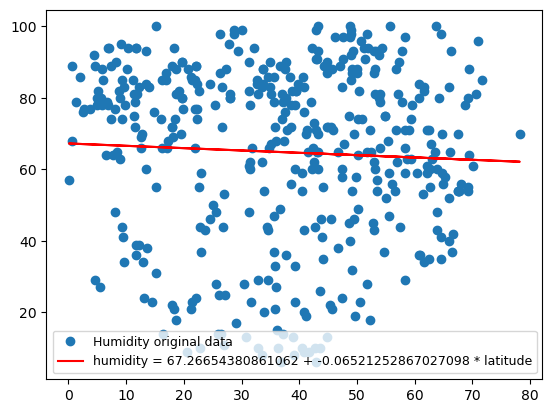

In [100]:
# Northern Hemisphere
nhumidy = northern_hemi_df["Humidity"]

nhum_slope, nhum_int, nhum_r, nhum_p, nhum_se = linregress(nx, nhumidy)
result_nhum = linregress(nx, nhumidy)
print(result_nhum)
plt.plot(nx, nhumidy, 'o', label = "Humidity original data")
plt.plot(nx, nhum_int + nhum_slope * nx, 'r', label = f"humidity = {nhum_int} + {nhum_slope} * latitude")
plt.legend(fontsize=9)
plt.show

LinregressResult(slope=-0.07040182845104351, intercept=70.27422754666753, rvalue=-0.04884333890749132, pvalue=0.5295253028455409, stderr=0.11173928529181748, intercept_stderr=2.8113233951232126)


<function matplotlib.pyplot.show(close=None, block=None)>

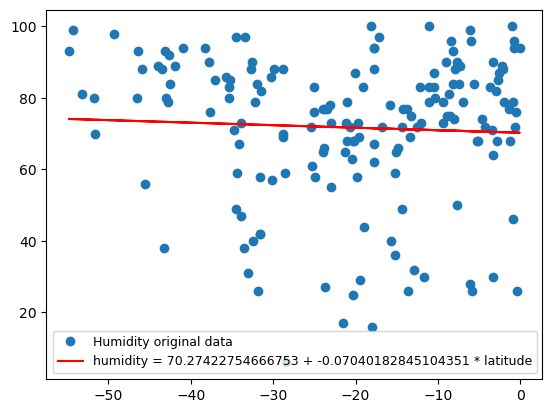

In [104]:
# Southern Hemisphere
shumidy = southern_hemi_df["Humidity"]

shum_slope, shum_int, shum_r, shum_p, shum_se = linregress(sx, shumidy)
result_shum = linregress(sx, shumidy)
print(result_shum)
plt.plot(sx, shumidy, 'o', label = "Humidity original data")
plt.plot(sx, shum_int + shum_slope * sx, 'r', label = f"humidity = {shum_int} + {shum_slope} * latitude")
plt.legend(fontsize = 9)
plt.show

**Discussion about the linear relationship:** There is no relationship in either hemisphere between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

LinregressResult(slope=-0.03236442514496966, intercept=62.55032319834512, rvalue=-0.015176310940998902, pvalue=0.7567578166252237, stderr=0.10441998699183631, intercept_stderr=4.336494252511793)


<function matplotlib.pyplot.show(close=None, block=None)>

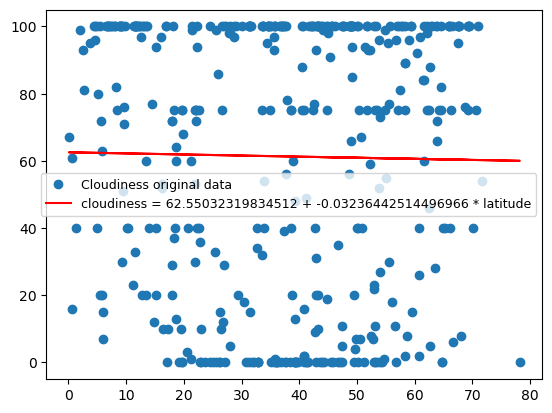

In [105]:
# Northern Hemisphere
ncloudy = northern_hemi_df["Cloudiness"]

ncloud_slope, ncloud_int, ncloud_r, ncloud_p, ncloud_se = linregress(nx, ncloudy)
result_ncloud = linregress(nx, ncloudy)
print(result_ncloud)
plt.plot(nx, ncloudy, 'o', label = "Cloudiness original data")
plt.plot(nx, ncloud_int + ncloud_slope * nx, 'r', label = f"cloudiness = {ncloud_int} + {ncloud_slope} * latitude")
plt.legend(fontsize = 9)
plt.show

LinregressResult(slope=0.13728755430330436, intercept=57.05700589041771, rvalue=0.04898905886382995, pvalue=0.5282963240686684, stderr=0.21724823864555226, intercept_stderr=5.465893702993612)


<function matplotlib.pyplot.show(close=None, block=None)>

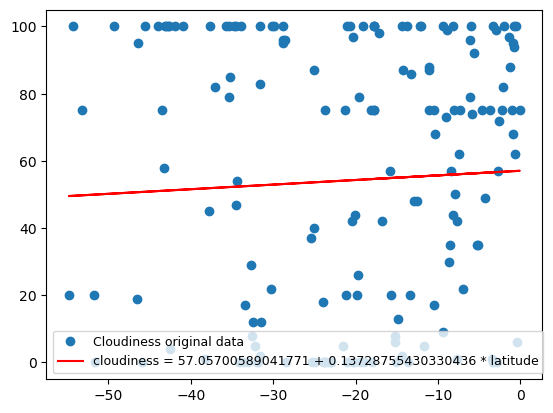

In [106]:
# Southern Hemisphere
scloudy = southern_hemi_df["Cloudiness"]

scloud_slope, scloud_int, scloud_r, scloud_p, scloud_se = linregress(sx, scloudy)
result_scloud = linregress(sx, scloudy)
print(result_scloud)
plt.plot(sx, scloudy, 'o', label = "Cloudiness original data")
plt.plot(sx, scloud_int + scloud_slope * sx, 'r', label = f"cloudiness = {scloud_int} + {scloud_slope} * latitude")
plt.legend(fontsize = 9)
plt.show

**Discussion about the linear relationship:** There is no relationship in either hemisphere between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

LinregressResult(slope=0.002998205376835864, intercept=7.706088376388411, rvalue=0.01086368685471205, pvalue=0.8245347035822868, stderr=0.013514204404808251, intercept_stderr=0.5612361332060144)


<function matplotlib.pyplot.show(close=None, block=None)>

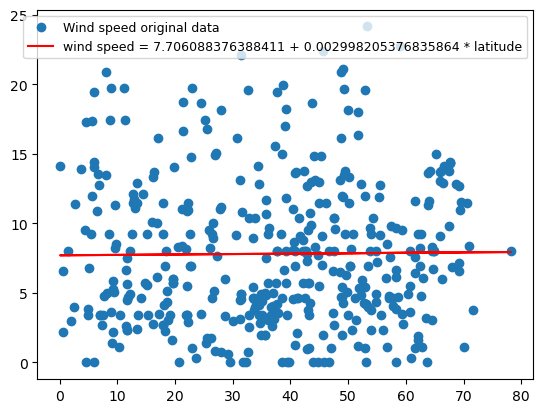

In [107]:
# Northern Hemisphere
nwindy = northern_hemi_df["Wind Speed"]

nwind_slope, nwind_int, nwind_r, nwind_p, nwind_se = linregress(nx, nwindy)
result_nwind = linregress(nx, nwindy)
print(result_nwind)
plt.plot(nx, nwindy, 'o', label = "Wind speed original data")
plt.plot(nx, nwind_int + nwind_slope * nx, 'r', label = f"wind speed = {nwind_int} + {nwind_slope} * latitude")
plt.legend(fontsize = 9)
plt.show

LinregressResult(slope=-0.048532197779974064, intercept=7.26110640239453, rvalue=-0.12296610582047879, pvalue=0.11229635412186036, stderr=0.030400589700553145, intercept_stderr=0.7648687641728221)


<function matplotlib.pyplot.show(close=None, block=None)>

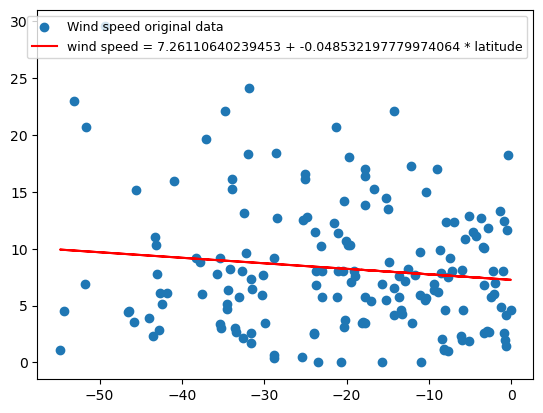

In [108]:
# Southern Hemisphere
swindy = southern_hemi_df["Wind Speed"]

swind_slope, swind_int, swind_r, swind_p, swind_se = linregress(sx, swindy)
result_swind = linregress(sx, swindy)
print(result_swind)
plt.plot(sx, swindy, 'o', label = "Wind speed original data")
plt.plot(sx, swind_int + swind_slope * sx, 'r', label = f"wind speed = {swind_int} + {swind_slope} * latitude")
plt.legend(fontsize=9)
plt.show

**Discussion about the linear relationship:** There is no relationship in either hemisphere between latitude and windspeed.